# Implementing Maximum Likelihood Estimation

The probability of obtaining exactly "k" heads in "n" flips of an unfair coin with a probability "a" of landing heads follows the Binomial probability formula. The probability mass function (PMF) of the Binomial distribution is given by:

$$
p(k)=\left(\begin{array}{l}
n \\
k
\end{array}\right) \alpha^k(1-\alpha)^{n-k}=\frac{n !}{k !(n-k) !} \alpha^k(1-\alpha)^{N-k}
$$

Where:
- $P(X = k)$ is the probability of getting exactly "k" heads.
- $\binom{n}{k}$ is the binomial coefficient, which is the number of ways to choose "k" successes out of "n" trials and is calculated as $\binom{n}{k} = \frac{n!}{k!(n-k)!}$.
- \(a\) is the probability of getting heads in a single coin flip.
- $(1 - a)$ is the probability of getting tails in a single coin flip.
- $n$ is the total number of coin flips.

This formula gives you the probability of obtaining exactly "k" heads in "n" trials when the probability of heads in each trial is "a" and the probability of tails is $(1 - a)$.

In statistics, particularly in the context of hypothesis testing and parameter estimation, we often encounter situations where we want to assess the likelihood of a certain parameter given the observed data. One common scenario is when dealing with a series of binary outcomes, such as the number of heads obtained in a series of coin flips.

Consider a sequence of 'n' coin flips, where each flip has a probability 'α' of landing heads ('success') and a probability of '1 - α' of landing tails ('failure'). We are interested in determining the likelihood of the parameter 'α' given that we observed 'k' heads in these 'n' trials. This likelihood function, denoted as $\mathcal{L}(\alpha \mid k)$, can be calculated using the Binomial probability formula, which describes the probability of getting exactly 'k' heads in 'n' flips of an unfair coin with a probability 'α' of landing heads:

$$
\mathcal{L}(\alpha \mid k) = p(k \mid \alpha) = \binom{n}{k} \alpha^k(1-\alpha)^{n-k} = \frac{n!}{k!(n-k)!} \alpha^k(1-\alpha)^{n-k}
$$

Here, we break down each component of the formula, including the binomial coefficient $\binom{n}{k}$, which represents the number of ways to choose 'k' successes out of 'n' trials, and 'α' and '1 - α,' which denote the probabilities of heads and tails, respectively. This formula allows us to quantify how likely it is that 'α' is the true probability of obtaining heads in each coin flip, given the observed 'k' heads in 'n' trials."


We often encounter scenarios where we need to model the likelihood of observing a series of events or outcomes. Let's consider a situation where we have ten independent events, denoted as $k_1, k_2, \ldots, k_{10}$, and we want to understand how these events are influenced by a parameter $\alpha$. We can model the joint probability of observing these events, given $\alpha$, as the product of their individual probabilities. This can be expressed as:

$$
p\left(k_1, k_2, \ldots, k_{10} \mid \alpha\right) = p\left(k_1 \mid \alpha\right) \cdot p\left(k_2 \mid \alpha\right) \cdots p\left(k_{10} \mid \alpha\right) = \prod_{i=1}^{10} p\left(k_i \mid \alpha\right)
$$

In this equation, $p\left(k_i \mid \alpha\right)$ represents the probability of observing event $k_i$ given the parameter $\alpha$, and the product notation $\prod_{i=1}^{10}$ signifies that we are calculating the joint probability for all ten events.

Furthermore, when we are interested in estimating the parameter $\alpha$ based on the observed events $k_1, k_2, \ldots, k_{10}$, we can use the likelihood function, denoted as $\mathcal{L}\left(\alpha \mid k_1, k_2, \ldots, k_{10}\right)$, which is simply the product of the individual event probabilities:

$$
\mathcal{L}\left(\alpha \mid k_1, k_2, \ldots, k_{10}\right) = \prod_{i=1}^{10} p\left(k_i \mid \alpha\right)
$$

This likelihood function allows us to assess how well different values of $\alpha$ explain the observed events $k_1, k_2, \ldots, k_{10}$, which is essential for parameter estimation and statistical inference."



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
import scipy.special
from scipy.special import gamma
import seaborn as sns


In [2]:
def likelihood(param,f,sample,log=False):

    if log==False:
      result = 1.0
      for x in sample:

          result *= f(x=x,param=param)
    else:
      result = 0
      for x in sample:

          result += f(x=x,param=param)

    return result


def plot_likelihood(xmin,xmax,paramName,likelihood_function,sample,log=False):
  x = np.arange(xmin, xmax, (xmax-xmin)/100)
  y = [likelihood(X,f=likelihood_function,sample=sample,log=log) for X in x]
  plt.plot(x,y)
  plt.xlabel(f"${paramName}$")
  if log:
    plt.ylabel(f"ln$L({paramName}|sample)$")
  else:
    plt.ylabel(f"$L({paramName}|sample)$")

  if log:
    plt.title('Plot of the Log-Likelihood Function')
  else:
    plt.title('Plot of the Likelihood Function')
  lambda_mle_estimate = x[np.argmax(y)]
  print(f"The MLE estimate for lambda is {lambda_mle_estimate:.3f}")

  plt.grid()
  plt.show()



Maximum likelihood estimation (MLE) is a method used to estimate the parameters of a probability distribution by maximizing the likelihood function. The likelihood function represents the probability of observing a given set of data, assuming a specific distribution and parameter values. To find the MLE, you often work with the log-likelihood function because it simplifies the optimization process, turning products of probabilities into sums of logarithms. Here are the maximum likelihood and log-likelihood equations for the binomial, exponential, and chi-square distributions:

1. **Binomial Distribution:**

   The binomial distribution models the number of successes (usually denoted as "k") in a fixed number of independent Bernoulli trials (experiments with two possible outcomes: success or failure).

   Probability mass function (PMF):
   $$P(X = k) = \binom{n}{k} \cdot p^k \cdot (1 - p)^{n - k}$$

   - $n$: The number of trials.
   - $k$: The number of successes.
   - $p$: The probability of success in each trial.

   The likelihood function for a set of observed data {x_1, x_2, ..., x_n} in a binomial distribution is:

   $$L(p) = \prod_{i=1}^{n} \binom{n}{x_i} \cdot p^{x_i} \cdot (1 - p)^{n - x_i}$$

   The log-likelihood function is:

   $$\ln L(p) = \sum_{i=1}^{n} \ln \left( \binom{n}{x_i} \cdot p^{x_i} \cdot (1 - p)^{n - x_i} \right)$$

2. **Exponential Distribution:**

   The exponential distribution models the time between events in a Poisson process, where events occur continuously and independently at a constant rate (lambda, denoted as "λ").

   Probability density function (PDF):
   $$f(x; \lambda) = \lambda \cdot e^{-\lambda x}$$

   - $x$: The random variable (time between events).
   - $\lambda$: The rate parameter.

   The likelihood function for a set of observed data {x_1, x_2, ..., x_n} in an exponential distribution is:

   $$L(\lambda) = \prod_{i=1}^{n} \lambda \cdot e^{-\lambda x_i}$$

   The log-likelihood function is:

   $$\ln L(\lambda) = \sum_{i=1}^{n} \ln \left( \lambda \cdot e^{-\lambda x_i} \right)$$

3. **Chi-Square Distribution:**

   The chi-square distribution is commonly used in statistical hypothesis testing, particularly in the context of testing the goodness of fit and assessing the independence of categorical variables.

   Probability density function (PDF):
   $$f(x; k) = \frac{1}{2^{k/2} \cdot \Gamma(k/2)} \cdot x^{k/2-1} \cdot e^{-x/2}$$

   - $x$: The random variable.
   - $k$: The degrees of freedom.
   - $\Gamma$ is the gamma function.

   The likelihood function for a set of observed data {x_1, x_2, ..., x_n} in a chi-square distribution is:

   $$L(k) = \prod_{i=1}^{n} \frac{1}{2^{k/2} \cdot \Gamma(k/2)} \cdot x_i^{k/2-1} \cdot e^{-x_i/2}$$

   The log-likelihood function is:

   $$\ln L(k) = \sum_{i=1}^{n} \ln \left( \frac{1}{2^{k/2} \cdot \Gamma(k/2)} \cdot x_i^{k/2-1} \cdot e^{-x_i/2} \right)$$

In practice, you would maximize the log-likelihood function with respect to the parameter(s) of interest (e.g., p, λ, or k) to estimate their MLEs using optimization techniques like gradient ascent or numerical methods.

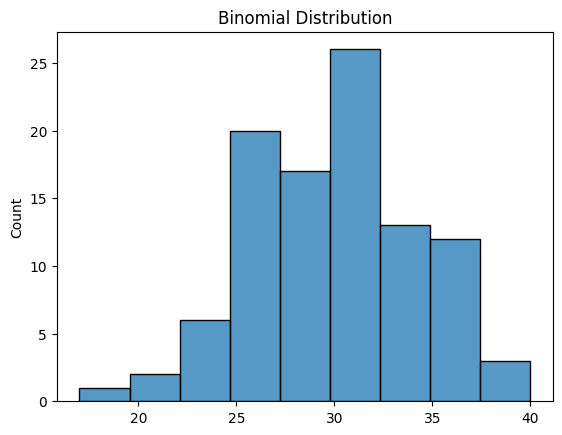

In [3]:
sample = np.random.binomial(n=100,p=.3,size=100)
sns.histplot(sample);
plt.title('Binomial Distribution');

The MLE estimate for lambda is 0.300


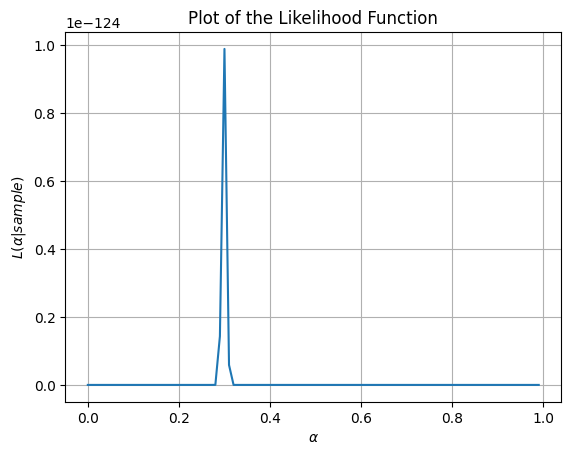

In [4]:
likelihood_function = lambda x, param: scipy.special.comb(100, x) * np.power(param, x) * np.power(1.0 - param, 100 - x)
plot_likelihood(xmin=0,xmax=1,paramName='\\alpha',sample=sample,likelihood_function=likelihood_function,log=False);

The MLE estimate for lambda is 0.300


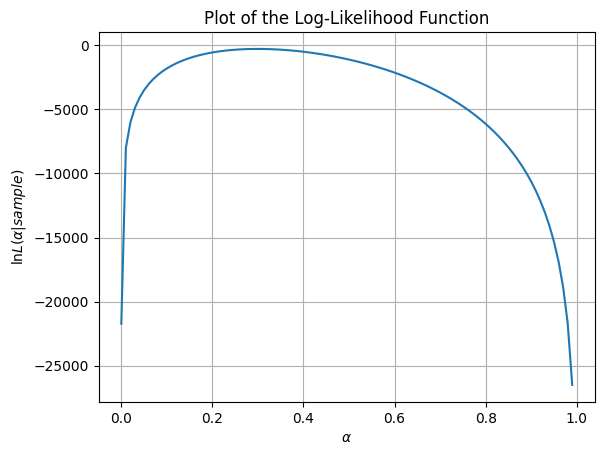

In [5]:
likelihood_function = lambda x, param: np.log(scipy.special.comb(100, x)) + x * np.log(param) + (100 - x) * np.log(1 - param)
plot_likelihood(xmin=0.0001,xmax=1,paramName='\\alpha',sample=sample,likelihood_function=likelihood_function,log=True);

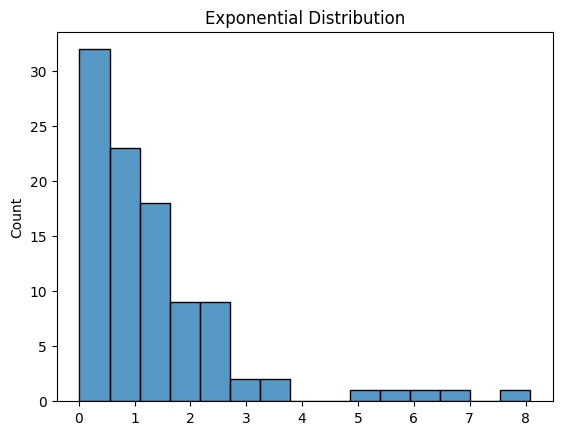

In [6]:
sample = np.random.exponential(scale=1/.8,size=100)
sns.histplot(sample);
plt.title('Exponential Distribution');

The MLE estimate for lambda is 0.760


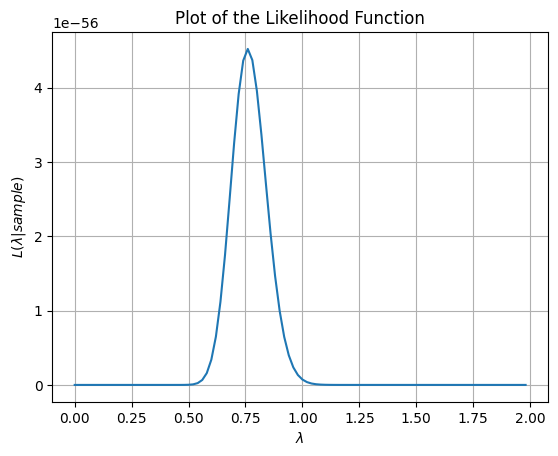

In [7]:
likelihood_function = lambda x, param: param * np.exp(-param*x)
plot_likelihood(xmin=0,xmax=2,paramName='\lambda',sample=sample,likelihood_function=likelihood_function);

The MLE estimate for lambda is 0.760


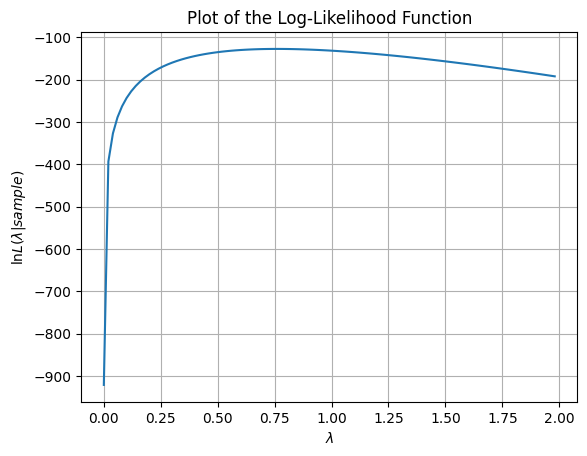

In [8]:
likelihood_function = lambda x, param: np.log(param) - param * x
plot_likelihood(xmin=0.0001,xmax=2,paramName='\lambda',sample=sample,likelihood_function=likelihood_function,log=True);

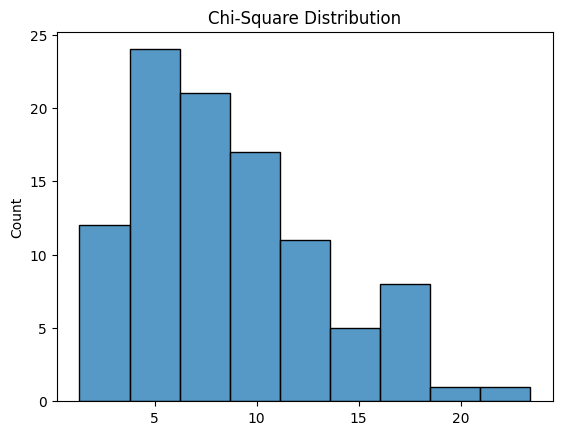

In [9]:
sample = np.random.chisquare(df=8,size=100)
sns.histplot(sample);
plt.title('Chi-Square Distribution');

The MLE estimate for lambda is 8.440


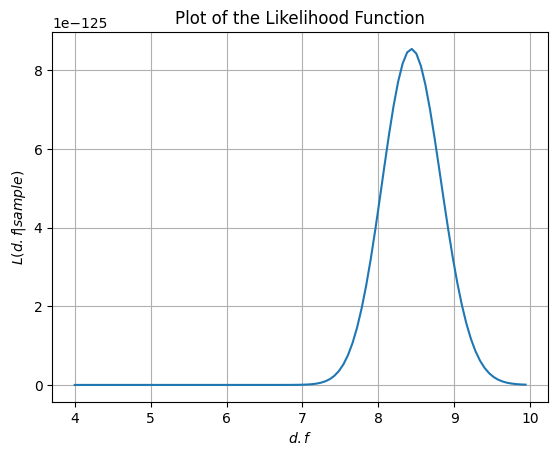

In [10]:
likelihood_function = lambda x, param: (x**(param/2 - 1) * np.exp(-x/2))/(2**(param/2) * gamma(param/2))
plot_likelihood(xmin=4,xmax=10,paramName='d.f',sample=sample,likelihood_function=likelihood_function);

The MLE estimate for lambda is 8.440


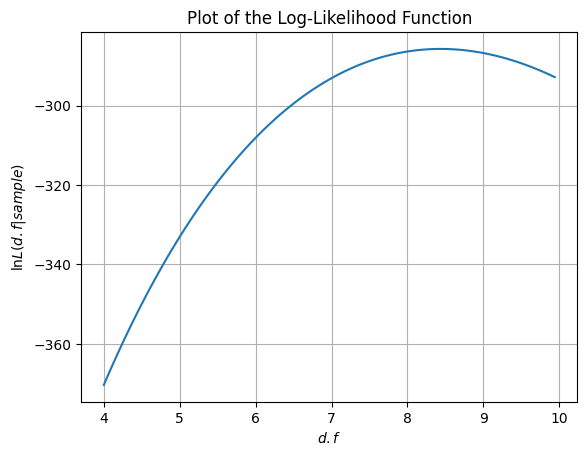

In [11]:
likelihood_function = lambda x, param: (param/2 - 1) * np.log(x) - x/2 - (param/2) * np.log(2) - np.log(gamma(param/2))
plot_likelihood(xmin=4,xmax=10,paramName='d.f',sample=sample,likelihood_function=likelihood_function,log=True);